# Training a network on the CIFAR10 dataset

We'll train a custom network on the cifar10 dataset. CIFAR10 is a dataset of images categorized into 10 categories. Goal of the network is to classify the images into the correct category.
* https://www.tensorflow.org/tutorials/images/cnn
* https://devashree-madhugiri.medium.com/using-cnn-for-image-classification-on-cifar-10-dataset-7803d9f3b983

Let's start with loading any libraries you need.

In [1]:
# Load libraries you need here
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from utils import plot_training_history


2023-12-07 12:36:48.902387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-07 12:36:48.902599: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-07 12:36:48.945503: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-07 12:36:49.042051: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-07 12:36:51.693657: W tensorflow/compiler/tf2

## Data

Load the data from the CIFAR10. The CIFAR-10 dataset contains 60,000 32x32 color images in 10 classes.
Info can be found in the documentation: https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data

Data is an array which can be handled by Keras. Also, batchning can be done with batch_size in fit().\
In case of PyTorch would have to make into dataset of tensors to be able to handle batchning with Dataloaders

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train, x_test = x_train / 255.0, x_test / 255.0 # normailzation of pixelvalues (done for all 3 channels)
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10) # onehot encoding of the 10 cathegories
x_train.shape, y_train.shape, x_test.shape, y_test.shape 

((50000, 32, 32, 3), (50000, 10), (10000, 32, 32, 3), (10000, 10))

In [4]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

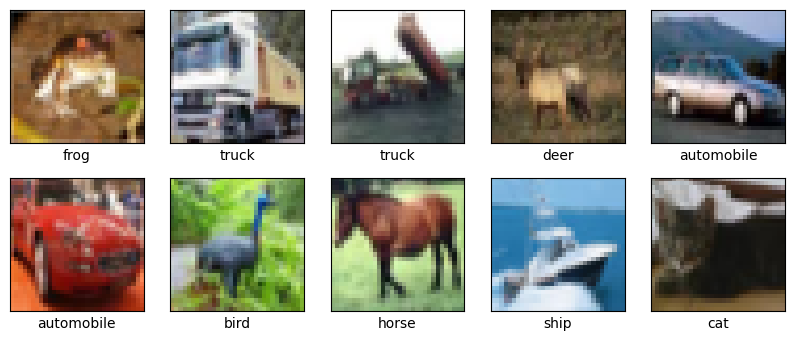

In [5]:
# visualize
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

## Base model

Create your model using conv2D layers, some type of pooling and finish with a dense network.

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

## Train and visualize base model
Train your model. Since the dataset is so big not a lot of epochs should be needed to start seeing results.

In [7]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2) # use same validation_data=(x_val, y_val) or validation_split = 0.2 with seed

Epoch 1/10


2023-12-07 12:37:00.995904: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 66s 52ms/step - loss: 1.4803 - accuracy: 0.4622 - val_loss: 1.1761 - val_accuracy: 0.5821
Epoch 2/10
1250/1250 [==============================] - 57s 46ms/step - loss: 1.0628 - accuracy: 0.6249 - val_loss: 1.0235 - val_accuracy: 0.6350
Epoch 3/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.8843 - accuracy: 0.6898 - val_loss: 0.9061 - val_accuracy: 0.6862
Epoch 4/10
1250/1250 [==============================] - 57s 46ms/step - loss: 0.7721 - accuracy: 0.7283 - val_loss: 0.8658 - val_accuracy: 0.7017
Epoch 5/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.6896 - accuracy: 0.7567 - val_loss: 0.8178 - val_accuracy: 0.7194
Epoch 6/10
1250/1250 [==============================] - 61s 49ms/step - loss: 0.6120 - accuracy: 0.7856 - val_loss: 0.8088 - val_accuracy: 0.7247
Epoch 7/10
1250/1250 [==============================] - 58s 46ms/step - loss: 0.5401 - accuracy: 0.8098 - val_loss: 0.8587 - val_accura

In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)

313/313 - 4s - loss: 1.0424 - accuracy: 0.7023 - 4s/epoch - 14ms/step


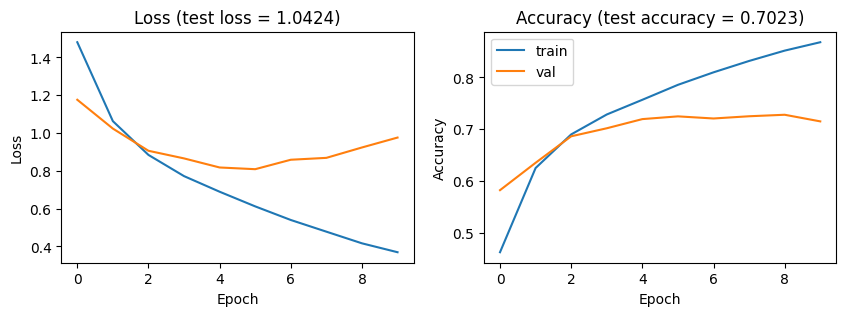

In [9]:
train_loss, train_accuracy, val_loss, val_accuracy = history.history.values()
plot_training_history(train_loss, train_accuracy, val_loss, val_accuracy, test_loss, test_accuracy)

Base model is overfitting

## Define imporved model to handle overfitting - model with dropouts

In [10]:
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10


2023-12-07 12:46:56.860730: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 58s 45ms/step - loss: 1.6232 - accuracy: 0.4126 - val_loss: 1.3189 - val_accuracy: 0.5386
Epoch 2/10
1250/1250 [==============================] - 52s 41ms/step - loss: 1.2439 - accuracy: 0.5563 - val_loss: 1.1535 - val_accuracy: 0.5883
Epoch 3/10
1250/1250 [==============================] - 55s 44ms/step - loss: 1.0932 - accuracy: 0.6123 - val_loss: 1.0252 - val_accuracy: 0.6379
Epoch 4/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9916 - accuracy: 0.6503 - val_loss: 1.1018 - val_accuracy: 0.6199
Epoch 5/10
1250/1250 [==============================] - 59s 47ms/step - loss: 0.9279 - accuracy: 0.6728 - val_loss: 0.9896 - val_accuracy: 0.6557
Epoch 6/10
1250/1250 [==============================] - 59s 48ms/step - loss: 0.8742 - accuracy: 0.6915 - val_loss: 0.8893 - val_accuracy: 0.6966
Epoch 7/10
1250/1250 [==============================] - 60s 48ms/step - loss: 0.8375 - accuracy: 0.7060 - val_loss: 0.9204 - val_accura

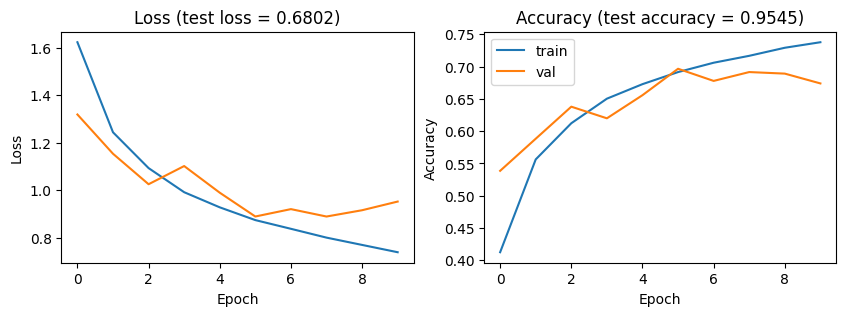

In [11]:
history = model_1.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_accuracy = model_1.evaluate(x_test, y_test, verbose=2)
train_loss, train_accuracy, val_loss, val_accuracy = history.history.values()
plot_training_history(train_loss, train_accuracy, val_loss, val_accuracy, test_accuracy, test_loss)

In [12]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10


2023-12-07 12:56:53.966515: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 180s 143ms/step - loss: 1.6362 - accuracy: 0.3900 - val_loss: 1.3611 - val_accuracy: 0.5037
Epoch 2/10
1250/1250 [==============================] - 150s 120ms/step - loss: 1.2235 - accuracy: 0.5626 - val_loss: 1.1144 - val_accuracy: 0.6041
Epoch 3/10
1250/1250 [==============================] - 166s 133ms/step - loss: 1.0452 - accuracy: 0.6309 - val_loss: 0.9471 - val_accuracy: 0.6597
Epoch 4/10
1250/1250 [==============================] - 153s 122ms/step - loss: 0.9359 - accuracy: 0.6698 - val_loss: 0.9725 - val_accuracy: 0.6567
Epoch 5/10
1250/1250 [==============================] - 152s 122ms/step - loss: 0.8512 - accuracy: 0.7000 - val_loss: 0.8185 - val_accuracy: 0.7182
Epoch 6/10
1250/1250 [==============================] - 154s 123ms/step - loss: 0.7935 - accuracy: 0.7197 - val_loss: 0.8005 - val_accuracy: 0.7182
Epoch 7/10
1250/1250 [==============================] - 152s 122ms/step - loss: 0.7384 - accuracy: 0.7398 - val_loss: 0.872

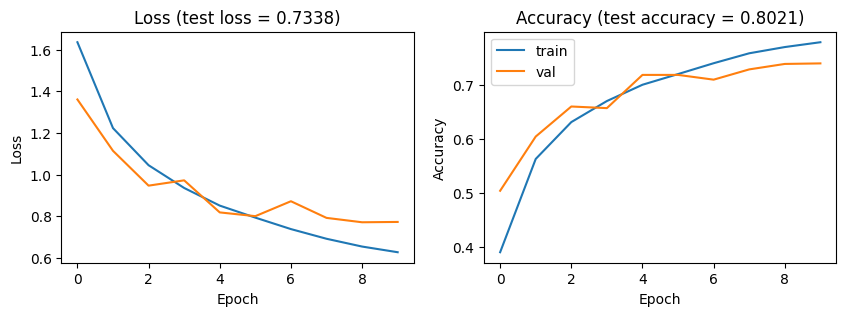

In [13]:
history = model_2.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_accuracy = model_2.evaluate(x_test, y_test, verbose=2)
train_loss, train_accuracy, val_loss, val_accuracy = history.history.values()
plot_training_history(train_loss, train_accuracy, val_loss, val_accuracy, test_accuracy, test_loss)

In [14]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same', input_shape = (32, 32, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides = 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), strides = (1, 1), activation = 'relu', padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])
model_3.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/10


2023-12-07 13:23:04.601950: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 491520000 exceeds 10% of free system memory.


1250/1250 [==============================] - 104s 82ms/step - loss: 1.6095 - accuracy: 0.4095 - val_loss: 1.3134 - val_accuracy: 0.5260
Epoch 2/10
1250/1250 [==============================] - 98s 79ms/step - loss: 1.2172 - accuracy: 0.5645 - val_loss: 1.1111 - val_accuracy: 0.6061
Epoch 3/10
1250/1250 [==============================] - 99s 79ms/step - loss: 1.0554 - accuracy: 0.6251 - val_loss: 0.9615 - val_accuracy: 0.6653
Epoch 4/10
1250/1250 [==============================] - 98s 78ms/step - loss: 0.9505 - accuracy: 0.6647 - val_loss: 0.9640 - val_accuracy: 0.6660
Epoch 5/10
1250/1250 [==============================] - 98s 79ms/step - loss: 0.8645 - accuracy: 0.6966 - val_loss: 0.9880 - val_accuracy: 0.6644
Epoch 6/10
1250/1250 [==============================] - 100s 80ms/step - loss: 0.8066 - accuracy: 0.7149 - val_loss: 0.9007 - val_accuracy: 0.6869
Epoch 7/10
1250/1250 [==============================] - 99s 80ms/step - loss: 0.7619 - accuracy: 0.7300 - val_loss: 0.8574 - val_accu

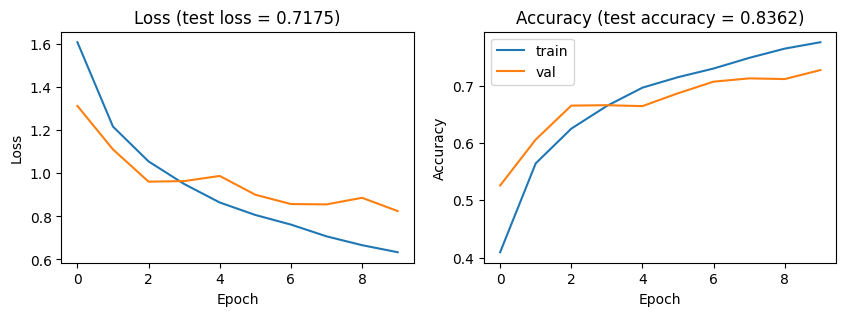

In [15]:
history = model_3.fit(x_train, y_train, epochs=10, validation_split=0.2)
test_loss, test_accuracy = model_3.evaluate(x_test, y_test, verbose=2)
train_loss, train_accuracy, val_loss, val_accuracy = history.history.values()
plot_training_history(train_loss, train_accuracy, val_loss, val_accuracy, test_accuracy, test_loss)

In [16]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)         

In [17]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 64)        36928     
                                                      

In [18]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 8, 8, 64)         